In [1]:
from gan.utils import GAN, realjack_generator, fake_z_generator
import numpy as np
import tqdm
import matplotlib.pyplot as plt
import pickle 
gan = GAN("models/")




Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor





## New start!


In [2]:
n_sample = 100000
red = np.random.randint(1, 34, [n_sample, 6])
blue = np.random.randint(1, 17, [n_sample, 1])
jack = np.concatenate([red, blue], axis=1)
jack.sort(axis=1)
# z = np.random.randn(n_sample, 7)
dlosses = []
glosses = []

In [3]:
# pretrain
e = tqdm.tqdm(range(100))

gen = realjack_generator(jack, 32)
for i in e:
    real_jack = next(gen)
    z = fake_z_generator(16, 7)
    _, dloss = gan.train_disc(real_jack, z)
    for i in range(2):
        _, gloss = gan.train_gen(z)
        dlosses.append(dloss)
    glosses.append(gloss)

100%|██████████| 100/100 [00:00<00:00, 247.37it/s]


In [4]:
with open("data/data1.pkl", "rb") as f:
    jack = pickle.load(f)

In [5]:
e = tqdm.tqdm(range(100))

gen = realjack_generator(jack, 32)
for i in e:
    real_jack = next(gen)
    z = fake_z_generator(16, 7)
    _, dloss = gan.train_disc(real_jack, z)
    for i in range(2):
        _, gloss = gan.train_gen(z)
        dlosses.append(dloss)
    glosses.append(gloss)

100%|██████████| 100/100 [00:00<00:00, 696.06it/s]


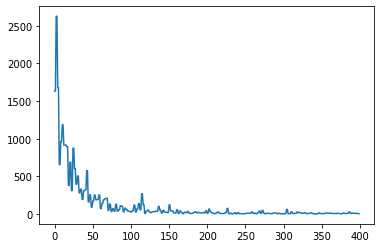

In [6]:
plt.plot(np.array(dlosses))
plt.show()

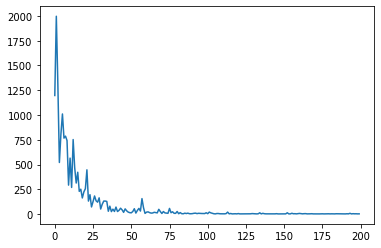

In [7]:
plt.plot(np.array(glosses))
plt.show()

In [8]:
fake_jack = gan.get_jack(z)
print(gan.get_prob(jack), gan.get_jack(z), gan.get_prob(fake_jack))

[[0.9339857 ]
 [0.9760356 ]
 [0.9311882 ]
 ...
 [0.98165953]
 [0.91564333]
 [0.96008694]] [[ 5.9852943   7.3204436   5.768082   13.74176     7.7104774  10.576763
   2.9881    ]
 [16.325516   14.615357   11.82429     1.947031   22.617752   15.12841
  10.340695  ]
 [ 9.017855   15.581573   10.484458   17.168251   11.425255   14.49393
   9.335309  ]
 [10.218265   15.741615    6.444827    4.6098185   4.1230183  17.862566
   9.283267  ]
 [21.207407   14.132064    7.506995    8.1600485   7.4267364  19.714214
   3.7356956 ]
 [17.292997    9.140621    7.421241    9.133192    9.828145   14.944866
   0.12944455]
 [17.095396    8.068655   29.77667    18.213692   32.098507   17.096188
  11.985702  ]
 [14.657283   17.946873   19.333565   10.376104   16.892017   12.95857
   3.0480328 ]
 [17.017023   18.019827   14.14622    17.33867     1.1670535  10.142691
   6.25686   ]
 [ 6.3467674   6.4499702   7.969901   10.433996    9.51802    17.183653
   7.9931307 ]
 [12.2088175   4.344725    9.0079155  16.05

In [24]:
np.round(fake_jack)

array([[ 6.,  7.,  6., 14.,  8., 11.,  3.],
       [16., 15., 12.,  2., 23., 15., 10.],
       [ 9., 16., 10., 17., 11., 14.,  9.],
       [10., 16.,  6.,  5.,  4., 18.,  9.],
       [21., 14.,  8.,  8.,  7., 20.,  4.],
       [17.,  9.,  7.,  9., 10., 15.,  0.],
       [17.,  8., 30., 18., 32., 17., 12.],
       [15., 18., 19., 10., 17., 13.,  3.],
       [17., 18., 14., 17.,  1., 10.,  6.],
       [ 6.,  6.,  8., 10., 10., 17.,  8.],
       [12.,  4.,  9., 16., 11., 16., 16.],
       [22., 18., 17.,  3., 28.,  9.,  5.],
       [ 6., 14., -1., 11., 13., 14.,  5.],
       [17., 10., 11., 17., 12., 21., 16.],
       [15.,  8., 21., 22., 14., 11., 12.],
       [20.,  4., 12., 11., 21.,  7.,  9.]], dtype=float32)

In [180]:
n = 100
z = fake_z_generator(n, 7)
fake_jack = gan.get_jack(z)
res_jack = []
for i in range(fake_jack.shape[0]):
    if np.unique(np.round(fake_jack[i, 0:6])).shape[0]>=5 and ((fake_jack[i, 0:7])>=1).all():
        prob = gan.get_prob(fake_jack[i,:].reshape(-1,7)).reshape(-1,)
        res_jack.append(np.concatenate([np.round(fake_jack[i,:]).astype(np.int), prob]))


In [182]:
print(np.array(res_jack)[np.array(res_jack)[:,7]>=0.9])

[[16.          8.         20.         10.         21.         25.
  16.          0.94568628]
 [34.         32.         28.          4.         15.          3.
   3.          0.92167467]
 [ 6.         13.         19.         18.         25.         23.
  14.          0.94715285]
 [21.         12.         16.          9.         20.         25.
  18.          0.90815181]
 [13.         18.         12.         22.         27.         20.
  19.          0.95989239]
 [23.         19.         25.         16.         32.         26.
  15.          0.91307521]
 [ 8.         14.         25.          6.         28.         20.
   4.          0.90111178]
 [ 8.         16.         15.         26.         22.         20.
  14.          0.92297393]
 [11.         12.         29.         18.         24.         23.
  15.          0.91047215]
 [11.         15.         20.          6.         34.         28.
  19.          0.95293862]
 [ 9.          4.         14.         13.         19.         20.
   7

array([0.90021425, 0.65221834, 0.77182448, 0.78669554, 0.71331197,
       0.62081492, 0.89086503, 0.72562587, 0.79142159, 0.74694341,
       0.55782437, 0.83553606, 0.74078989, 0.65908468, 0.76183945,
       0.62835419, 0.84614652, 0.68166292, 0.63669419, 0.66334593,
       0.69489425, 0.60577458, 0.63291246, 0.69392717, 0.84235913,
       0.7251246 , 0.62549555, 0.58777344, 0.58052838, 0.68767101,
       0.82523501, 0.83446968, 0.70717257, 0.57982767, 0.60517603,
       0.72547549, 0.76438218, 0.80249447, 0.85387141, 0.70701051,
       0.7992543 , 0.83523655, 0.67874026, 0.75480747, 0.90029311,
       0.67139298, 0.76416564, 0.68724608, 0.44151568, 0.6640681 ,
       0.76803255, 0.70419174, 0.51651299, 0.67819357, 0.80427796,
       0.83352488, 0.70768213, 0.83418721, 0.74307185, 0.60518438,
       0.83619052, 0.82001209, 0.90180951, 0.8200779 , 0.6769892 ,
       0.90862894])

In [20]:
import tensorflow as tf

In [21]:
tf.round

<function tensorflow.python.ops.math_ops.round>